### 4. Precinct and Demographic 
#### Discover Summon, Arrest, Force Used Rate for Race and Gender per Selected Precincts
 

Import libraries and load data

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as ticker

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\11_Vehicle_stop_NYPD\NYPD_Vehicle_Stop_Reports.csv')

sns.set_style('ticks')
# change data type 
df['date']=pd.to_datetime(df['OCCUR_DT'])
df['hour']=pd.to_datetime(df['OCCUR_TM'], format='%H:%M:%S').dt.hour

#### Selected Precincts

Precincts 22 : Most Summon Issued, lowest Arrested, Lowest Stop Count
Precincts 40 : 2nd Most Arrest, 3rd Most Force Used 
Precincts 46 : Most Arrest, Most Force Used
Precincts 75 : 2nd Most Lowest Summon Issued, Most Stopped
Precincts 101 : 2nd Most Force Used
Precincts 120 : Lowest Summon Issued


Filter the Dataframe with specific races and genders

In [90]:
flags=['FORCE_USED_FLG', 'ARREST_MADE_FLG', 'SUMMON_ISSUED_FLG']
gender_list = ['M', 'F']
race_list = ['WHITE', 'HISPANIC', 'ASIAN / PACIFIC ISLANDER', 'BLACK']
t_f =[True,False]

In [91]:
df= df[df['RACE_DESC'].isin(race_list) & df['SEX_CD'].isin(gender_list)].copy()

In [92]:
# DataFrame for each Precinct
df_22 =df[df['CMD_CD']==22]
df_40 =df[df['CMD_CD']==40]
df_46 =df[df['CMD_CD']==46]
df_75 =df[df['CMD_CD']==75]
df_101 =df[df['CMD_CD']==101]
df_120 =df[df['CMD_CD']==120]

### SUMMON

Created pivot tables for each precinct showing the rate of summons issued. Using a stacked bar chart, showed the percentage of summons issued for each race and gender group.

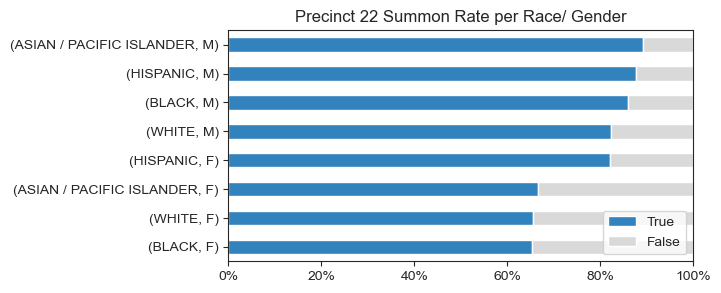

In [123]:
df_22_summon = df_22.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='SUMMON_ISSUED_FLG')
df_22_summon = df_22_summon.div(df_22_summon.sum()/100, axis=1).reindex(t_f,axis=0)
df_22_summon.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend(loc='lower right')
plt.title('Precinct 22 Summon Rate per Race/ Gender')
plt.ylabel('')
plt.xlim(0,100)

plt.show()

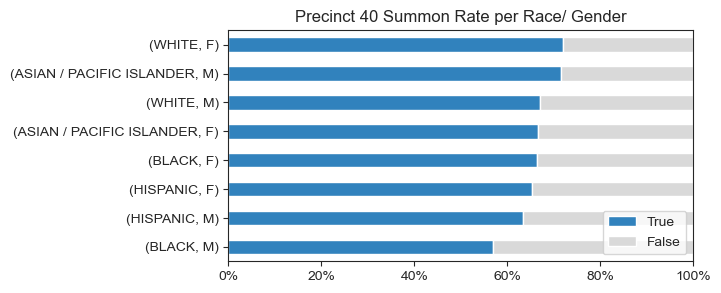

In [115]:
df_40_summon = df_40.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='SUMMON_ISSUED_FLG')
df_40_summon = df_40_summon.div(df_40_summon.sum()/100, axis=1).reindex(t_f,axis=0)

df_40_summon.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend(loc='lower right')
plt.title('Precinct 40 Summon Rate per Race/ Gender')
plt.ylabel('')
plt.xlim(0,100)

plt.show()

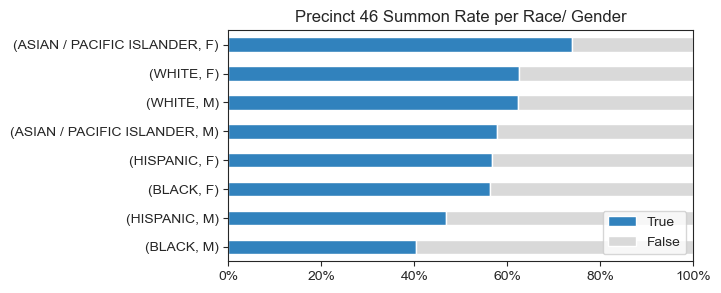

In [114]:
df_46_summon = df_46.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='SUMMON_ISSUED_FLG')
df_46_summon = df_46_summon.div(df_46_summon.sum()/100, axis=1).reindex(t_f,axis=0)
df_46_summon.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend(loc='lower right')
plt.title('Precinct 46 Summon Rate per Race/ Gender')
plt.ylabel('')
plt.xlim(0,100)

plt.show()

### ARREST


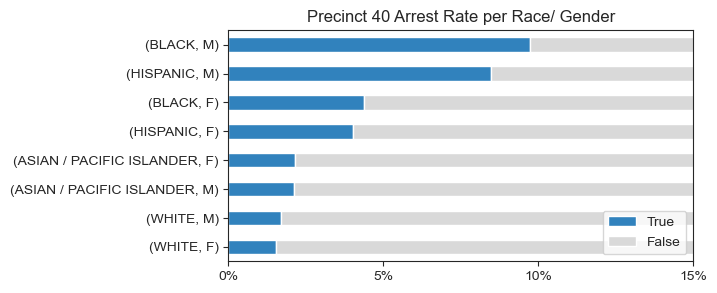

In [116]:
df_40_arrest = df_40.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='ARREST_MADE_FLG')
df_40_arrest = df_40_arrest.div(df_40_arrest.sum()/100, axis=1).fillna(0)
df_40_arrest = df_40_arrest.reindex(t_f,axis=0)
df_40_arrest.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend(loc='lower right')
plt.title('Precinct 40 Arrest Rate per Race/ Gender')
plt.ylabel('')
plt.xlim(0,15)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()

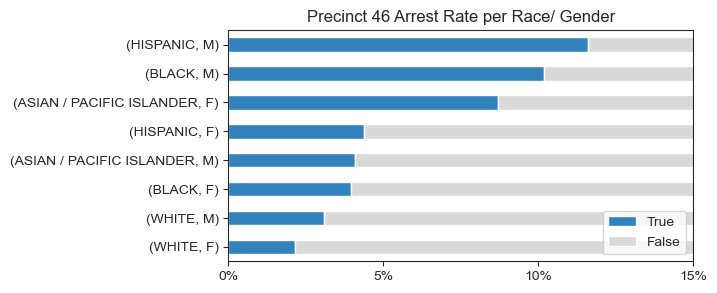

In [117]:
df_46_arrest = df_46.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='ARREST_MADE_FLG')
df_46_arrest = df_46_arrest.div(df_46_arrest.sum()/100, axis=1)
df_46_arrest = df_46_arrest.reindex(t_f,axis=0)
df_46_arrest.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend(loc='lower right')
plt.title('Precinct 46 Arrest Rate per Race/ Gender')
plt.ylabel('')
plt.xlim(0,15)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()

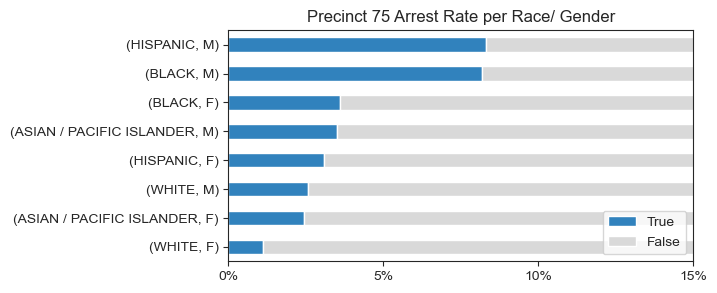

In [118]:

df_75_arrest = df_75.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='ARREST_MADE_FLG')
df_75_arrest = df_75_arrest.div(df_75_arrest.sum()/100, axis=1)
df_75_arrest = df_75_arrest.reindex(t_f,axis=0)
df_75_arrest.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend(loc='lower right')
plt.title('Precinct 75 Arrest Rate per Race/ Gender')
plt.ylabel('')
plt.xlim(0,15)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

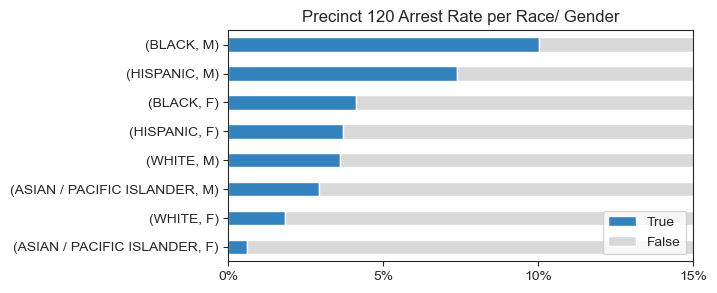

In [119]:
df_120_arrest = df_120.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='ARREST_MADE_FLG')
df_120_arrest = df_120_arrest.div(df_120_arrest.sum()/100, axis=1)
df_120_arrest = df_120_arrest.reindex(t_f,axis=0)
df_120_arrest.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend(loc='lower right')
plt.title('Precinct 120 Arrest Rate per Race/ Gender')
plt.ylabel('')
plt.xlim(0,15)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

### FORCE USED

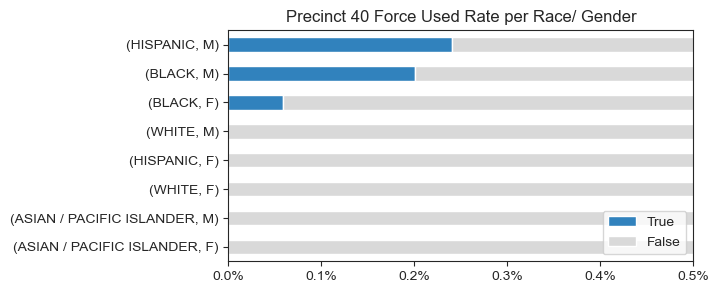

In [120]:
df_40_force = df_40.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='FORCE_USED_FLG')
df_40_force = df_40_force.div(df_40_force.sum()/100, axis=1).fillna(0)
df_40_force = df_40_force.reindex(t_f,axis=0)
df_40_force.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.legend(loc='lower right')
plt.title('Precinct 40 Force Used Rate per Race/ Gender')
plt.ylabel('')
plt.xlim(0,0.5)

plt.show()

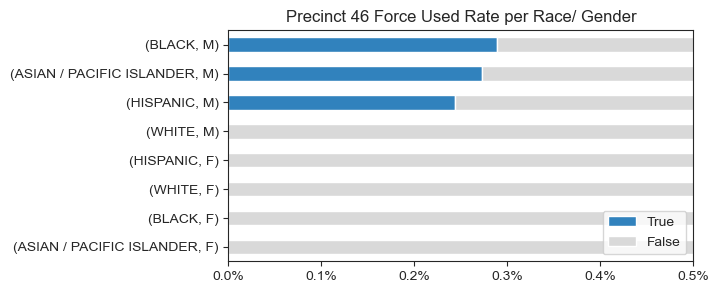

In [121]:
df_46_force = df_46.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='FORCE_USED_FLG')
df_46_force = df_46_force.div(df_46_force.sum()/100, axis=1).fillna(0)
df_46_force = df_46_force.reindex(t_f,axis=0)
df_46_force.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.legend(loc='lower right')
plt.title('Precinct 46 Force Used Rate per Race/ Gender')
plt.ylabel('')
plt.xlim(0,0.5)

plt.show()

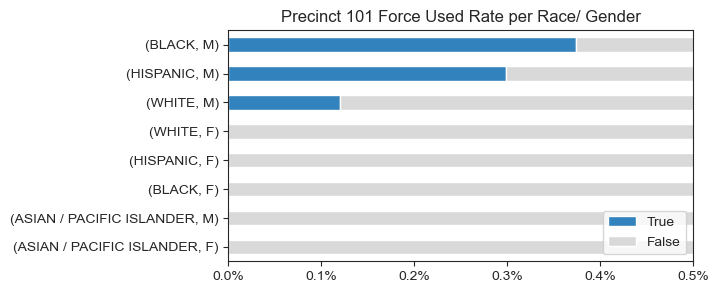

In [122]:
df_101_force = df_101.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='FORCE_USED_FLG')
df_101_force = df_101_force.div(df_101_force.sum()/100, axis=1).fillna(0)
df_101_force = df_101_force.reindex(t_f,axis=0)
df_101_force.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.legend(loc='lower right')
plt.title('Precinct 101 Force Used Rate per Race/ Gender')
plt.ylabel('')
plt.xlim(0,0.5)

plt.show()

**Insight**
This results provide the relation of policing activities with race and gender, this analysis helps identify potential disparities in law enforcement practices. 